In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-colorblind')
%matplotlib inline

In [201]:
#The file is stored locally
df = pd.read_csv('/Users/stevalang/Galvanize/0002_capstones/capstone1/accept_reject_bank_offer/data/bank-full.csv', delimiter=';')

In [202]:
# look at the first five rows of the bank-full.csv file.
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [203]:
# Rotate the columns to rows for more visibility of the features
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [204]:
df.shape

(45211, 17)

In [205]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [207]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [208]:
# Check the uniques values of every column
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('----'*20)

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------------------------------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------------------------------------
marital
['married' 'single' 'divorced']
--------------------------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------------------------------------
default
['no' 'yes']
--------------------------------------------------------------------------------
balance
[ 2143    29     2 ...  8205 14204 16353]
-----------------------------------

In [209]:
# List of non numeric columns
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [210]:
# Categorical Variables:
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

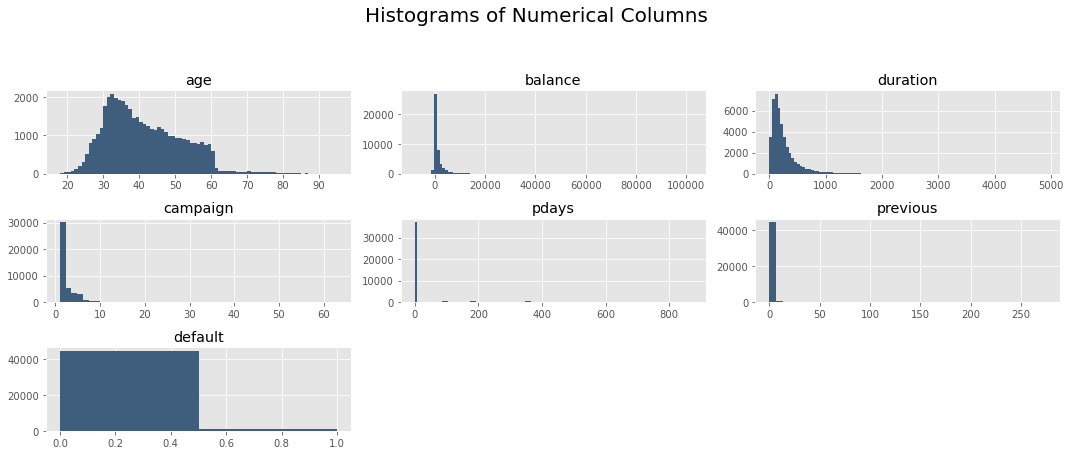

In [211]:
X = df.drop(['y','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']

X = pd.get_dummies(X)
y = pd.get_dummies(y)

X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

df2 = X
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('hist_num_cols.png')



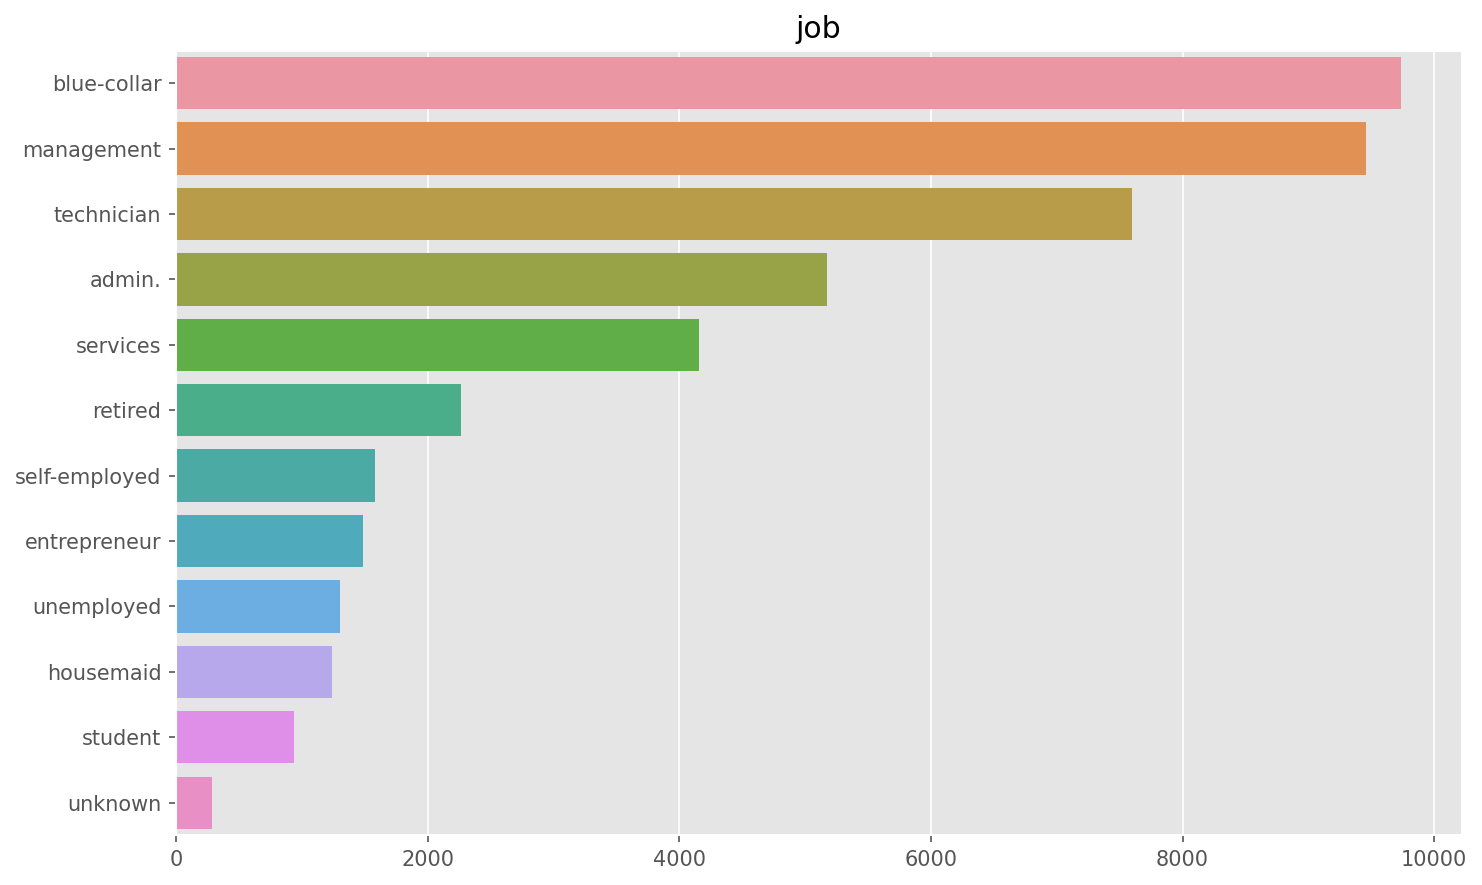

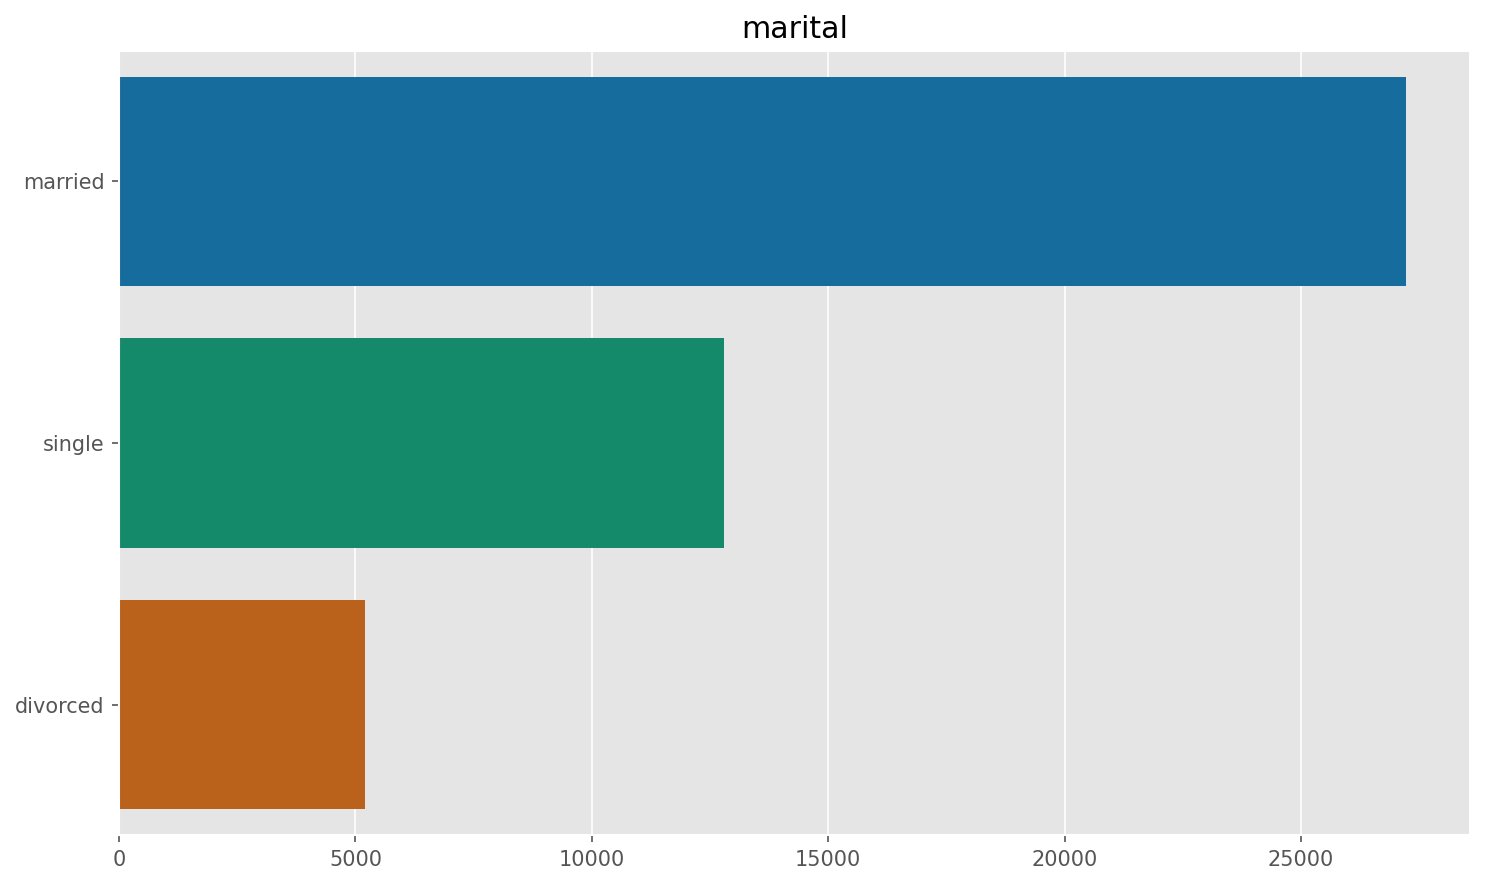

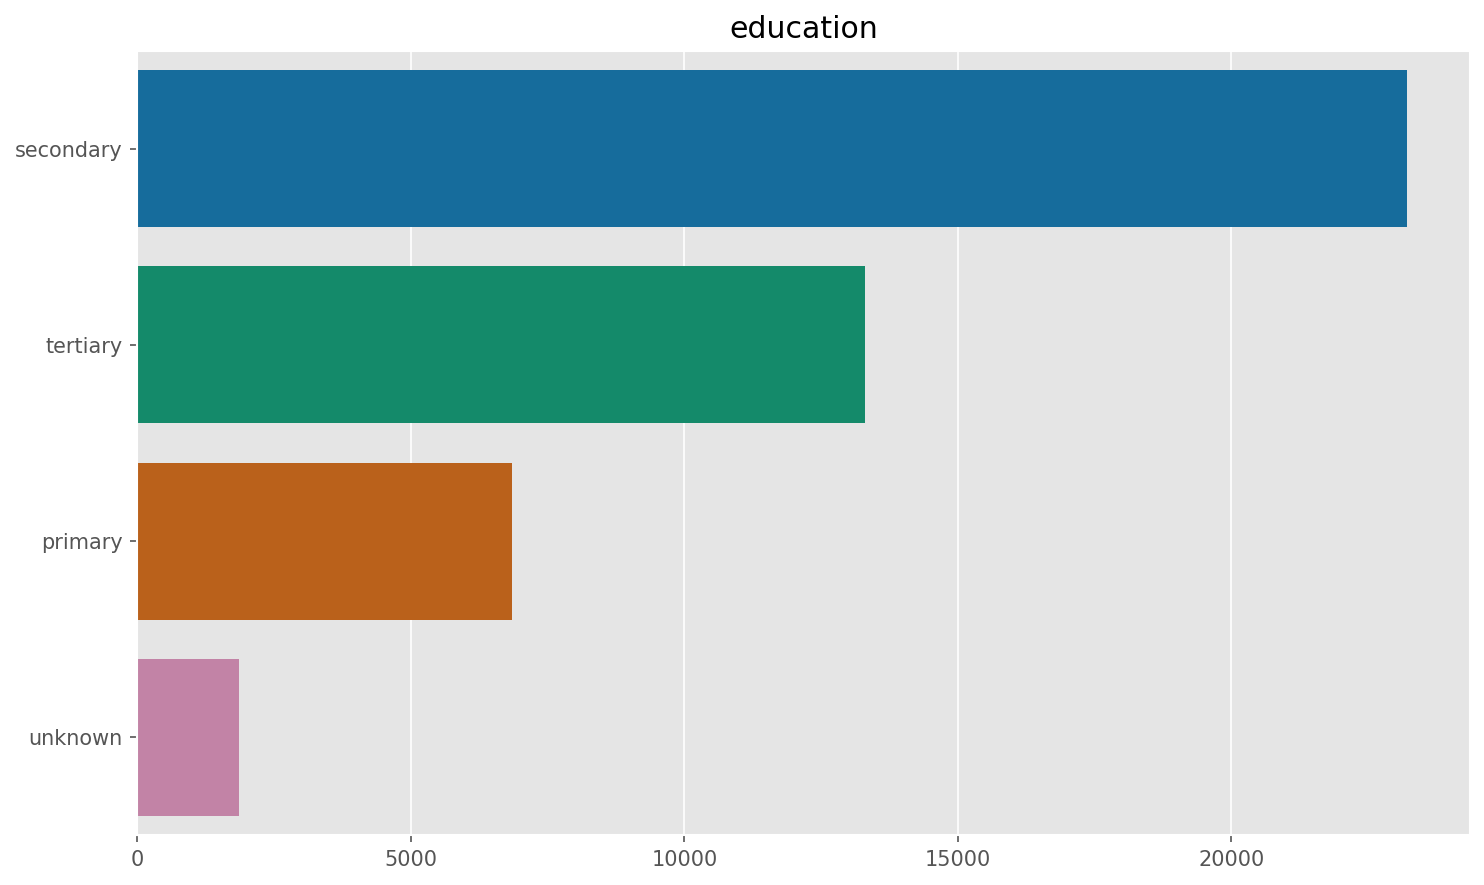

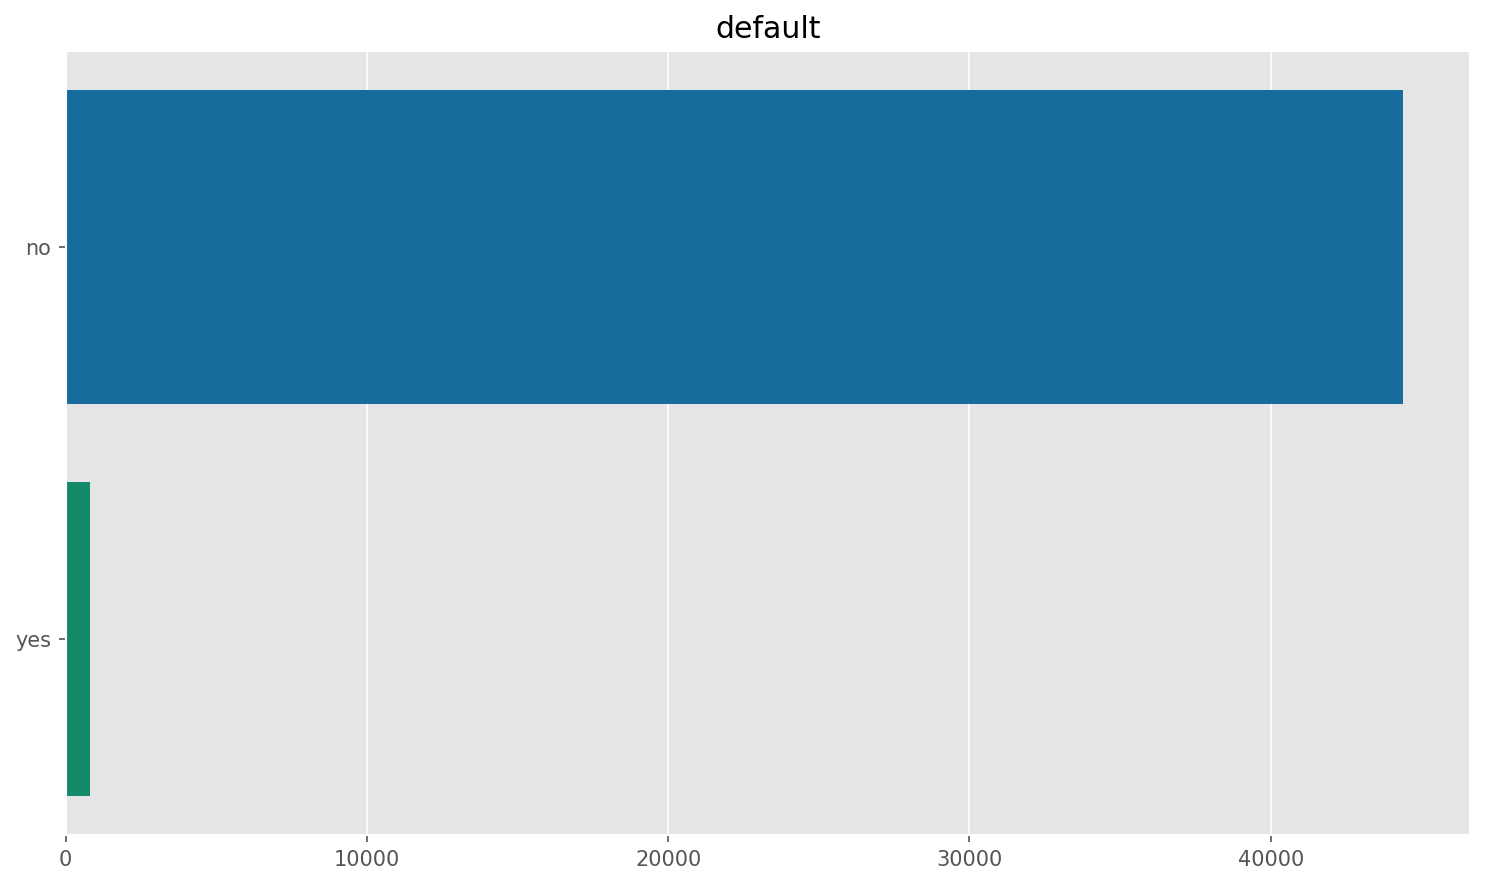

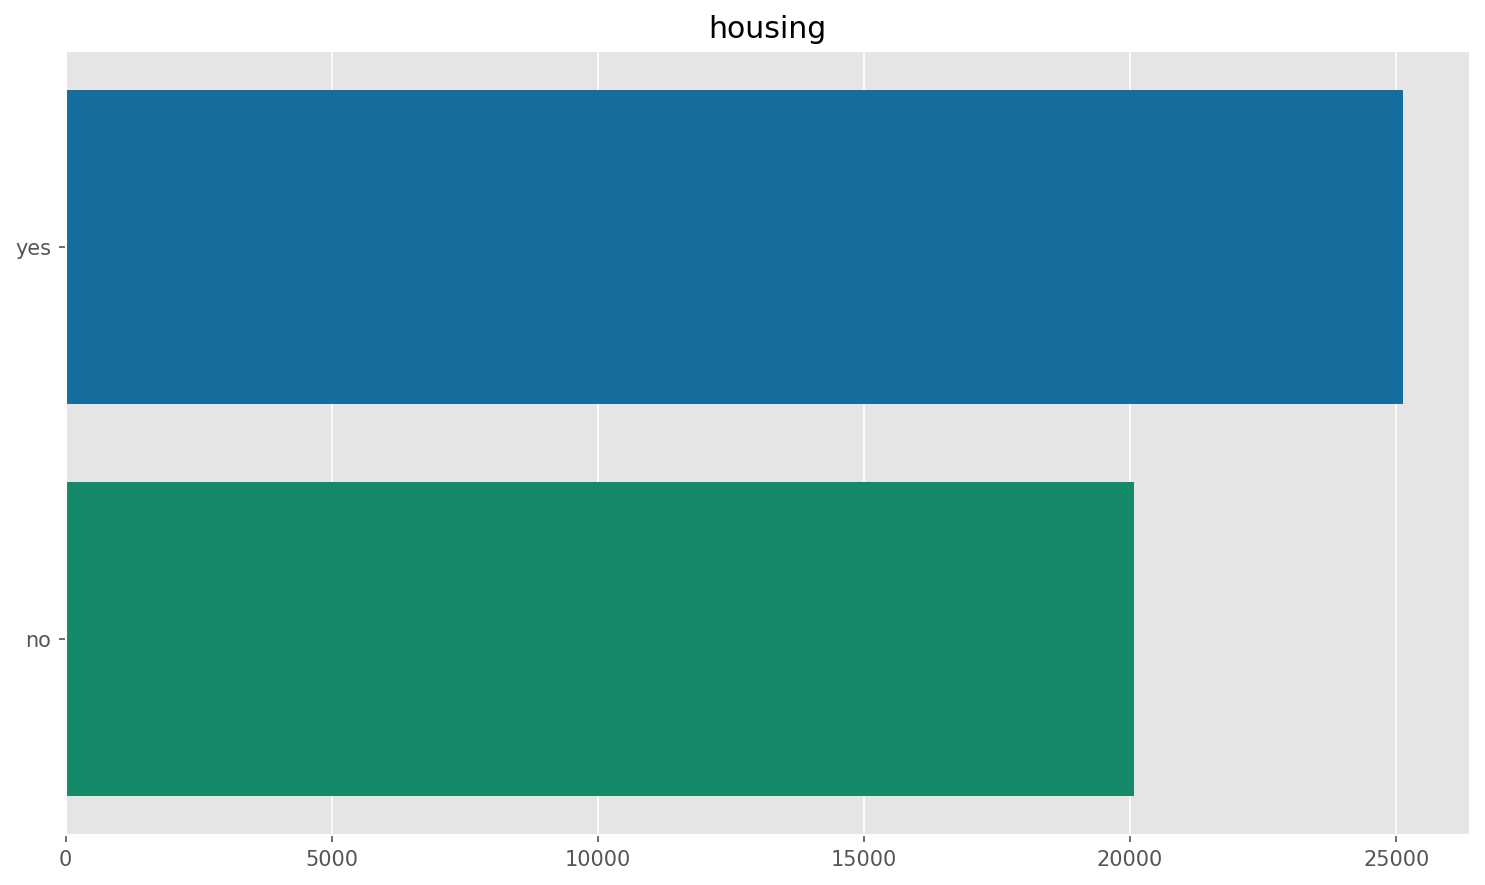

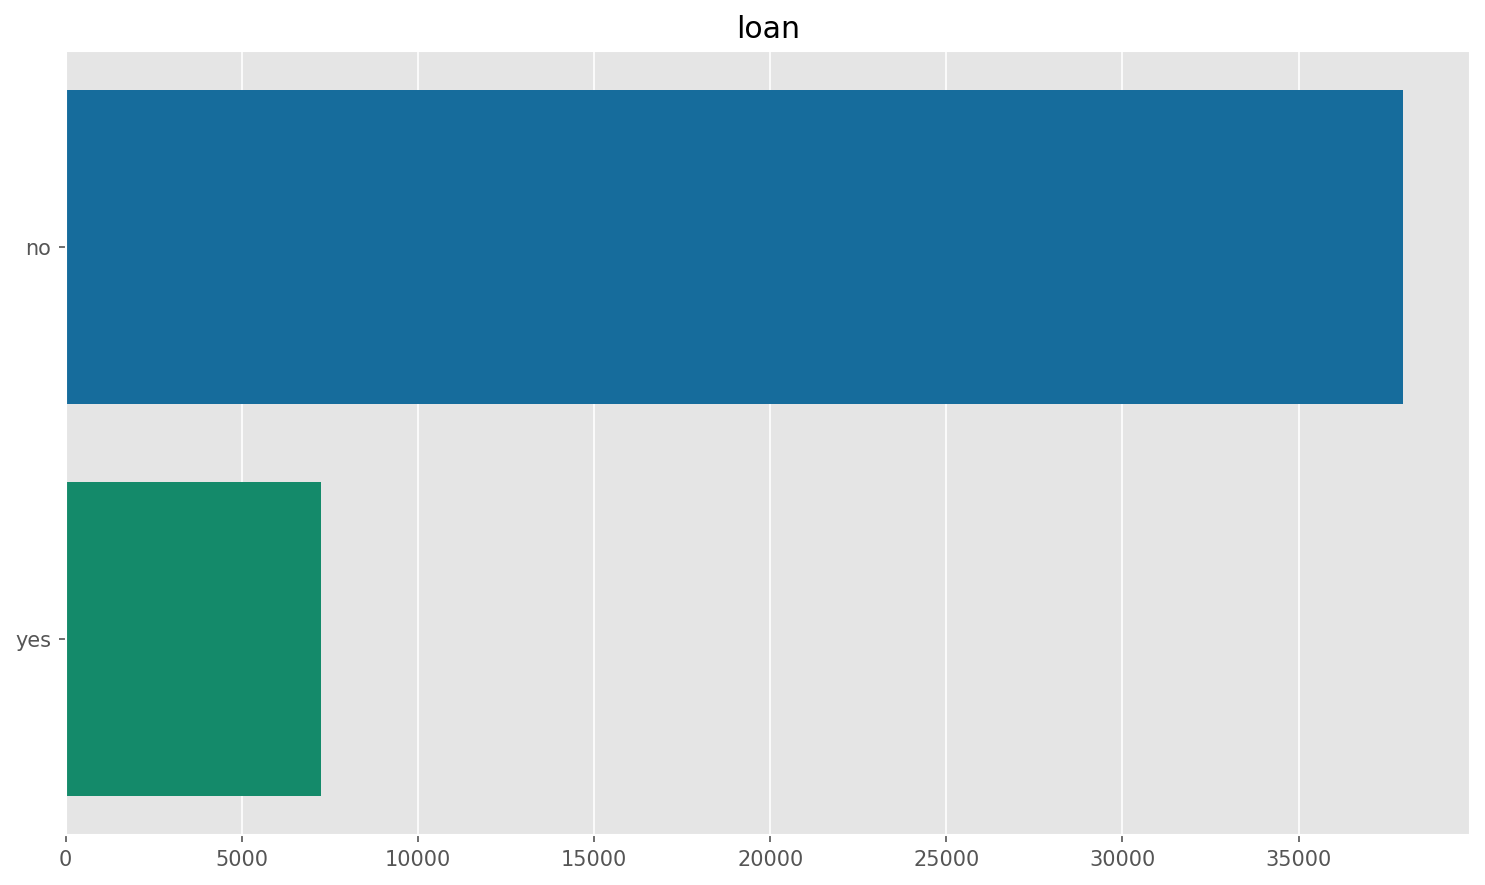

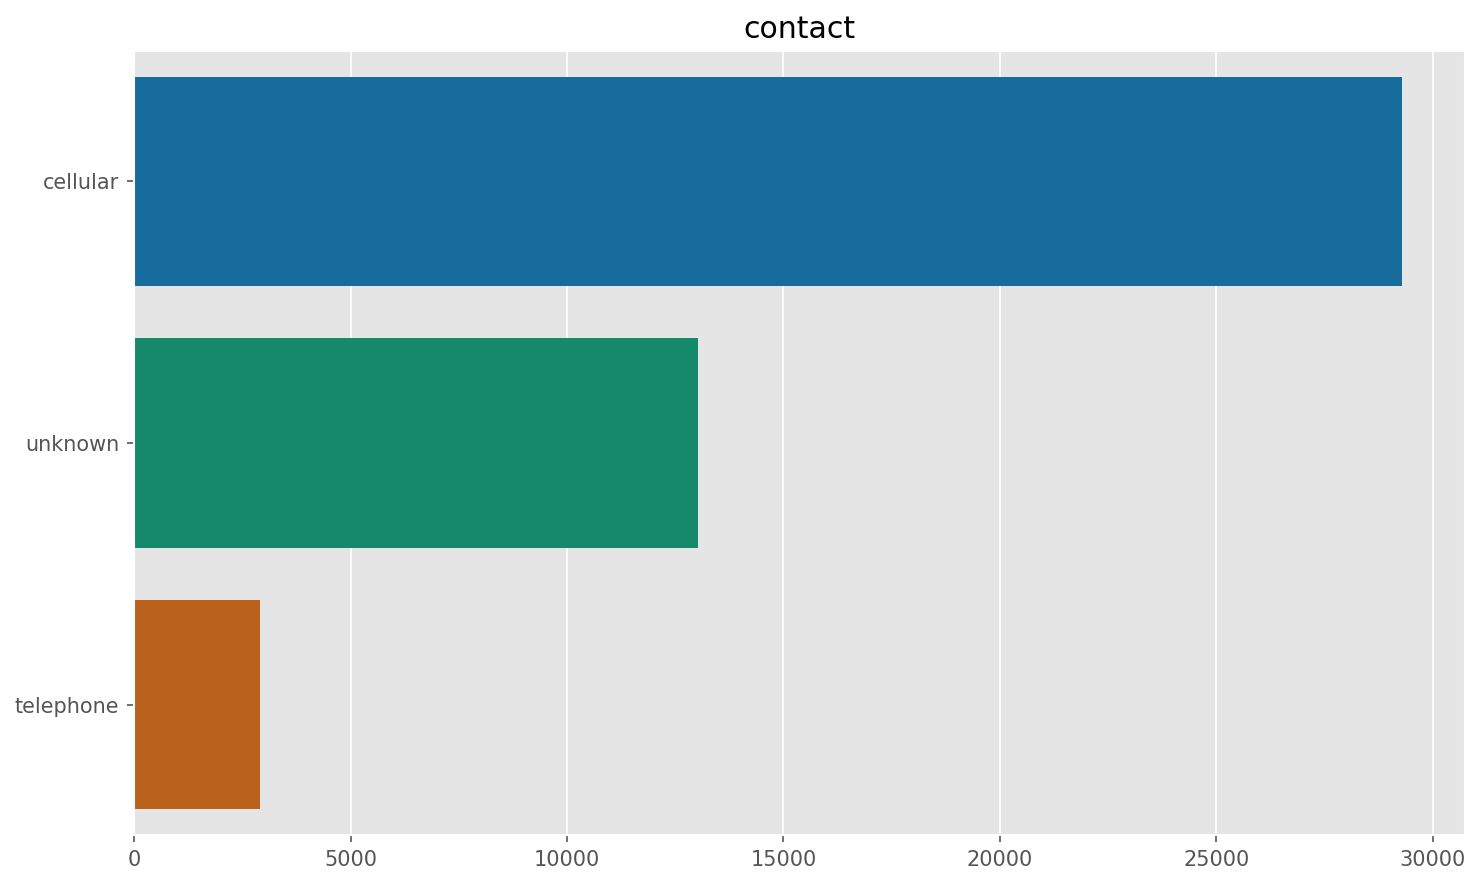

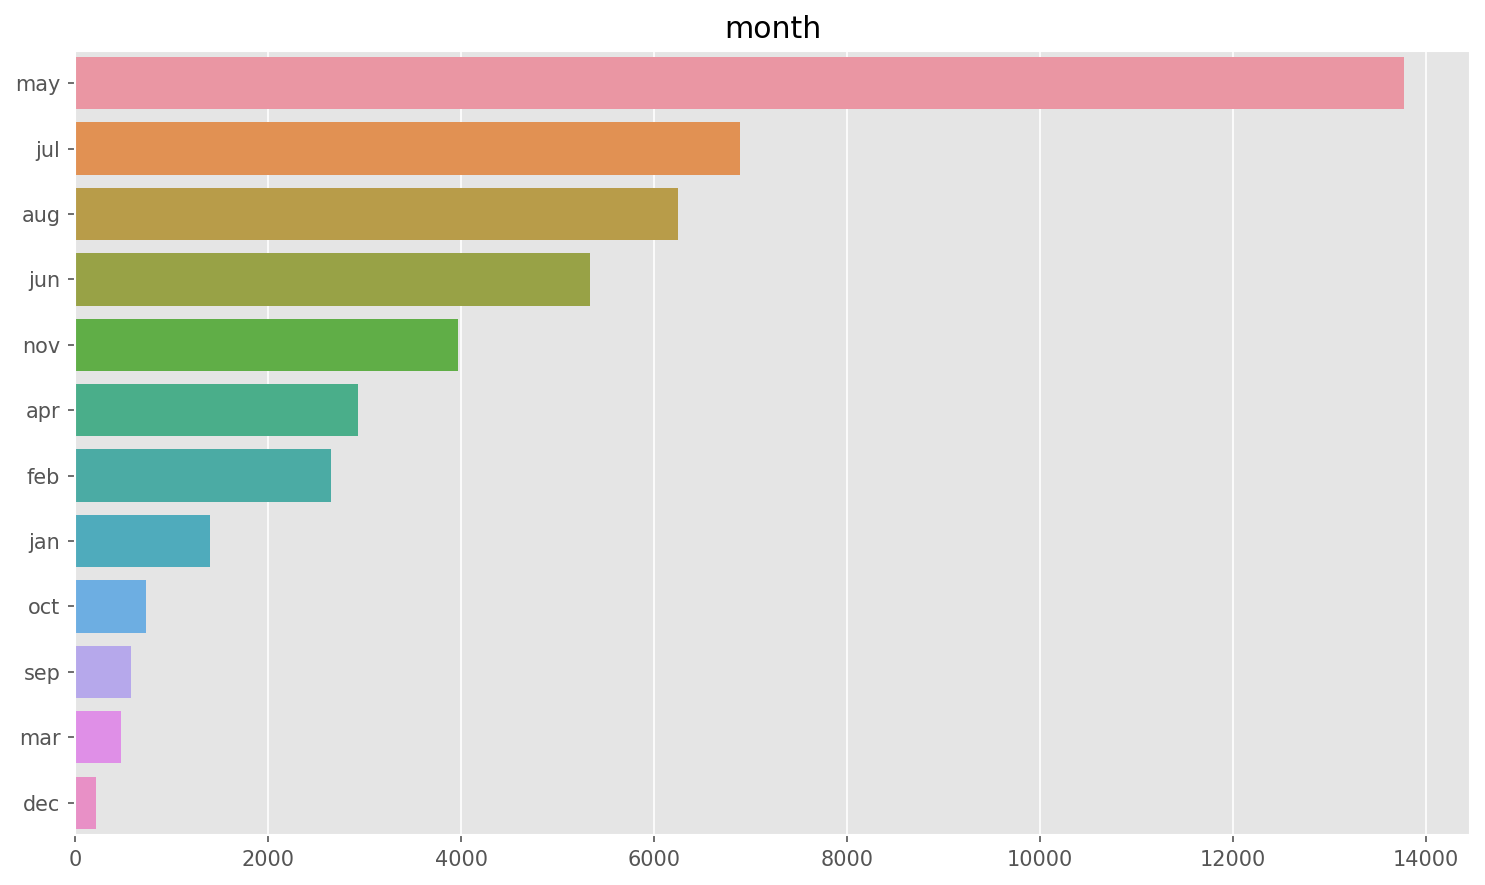

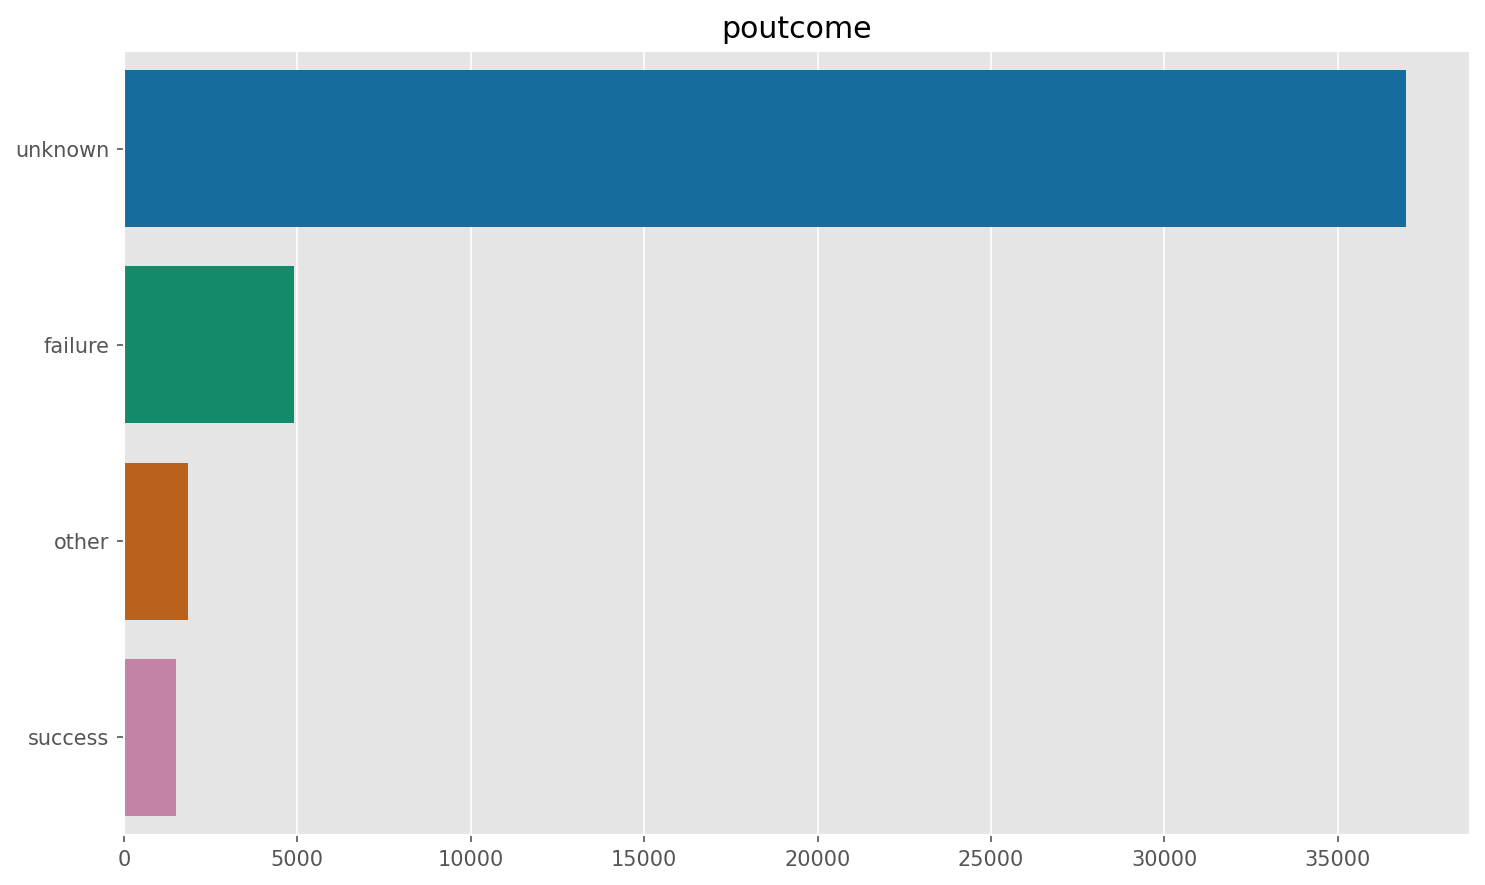

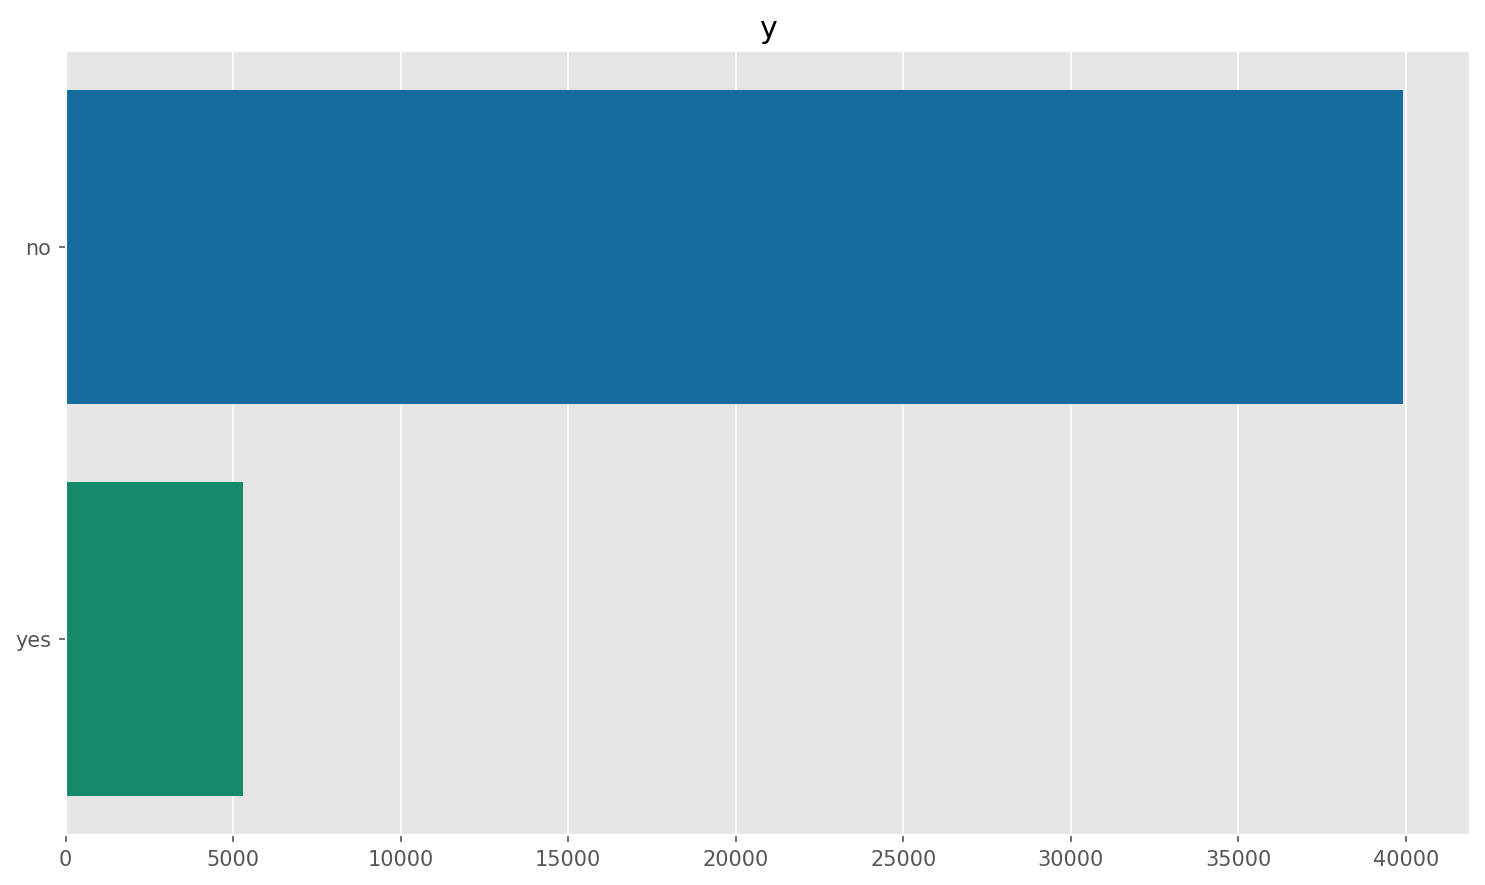

In [212]:
# See what are the categories.
for col in category_cols:
    plt.figure(figsize=(10,6), dpi=150)
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [213]:
custum_yes_df = df.loc[df.y == 'yes']
custum_no_df = df.loc[df.y == 'no']

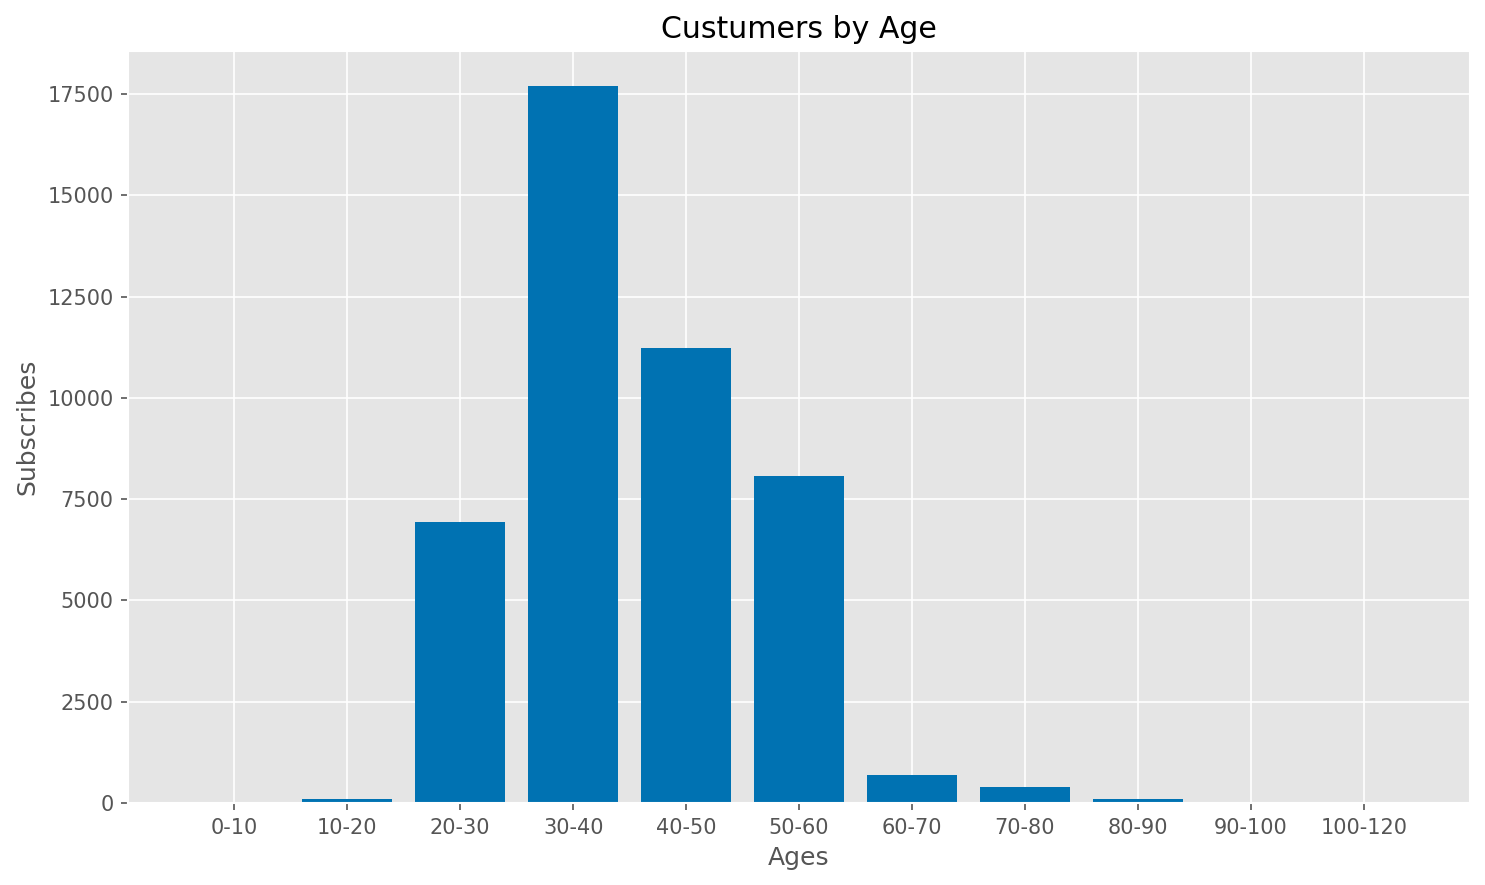

In [214]:
df['bin'] = pd.cut(df['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

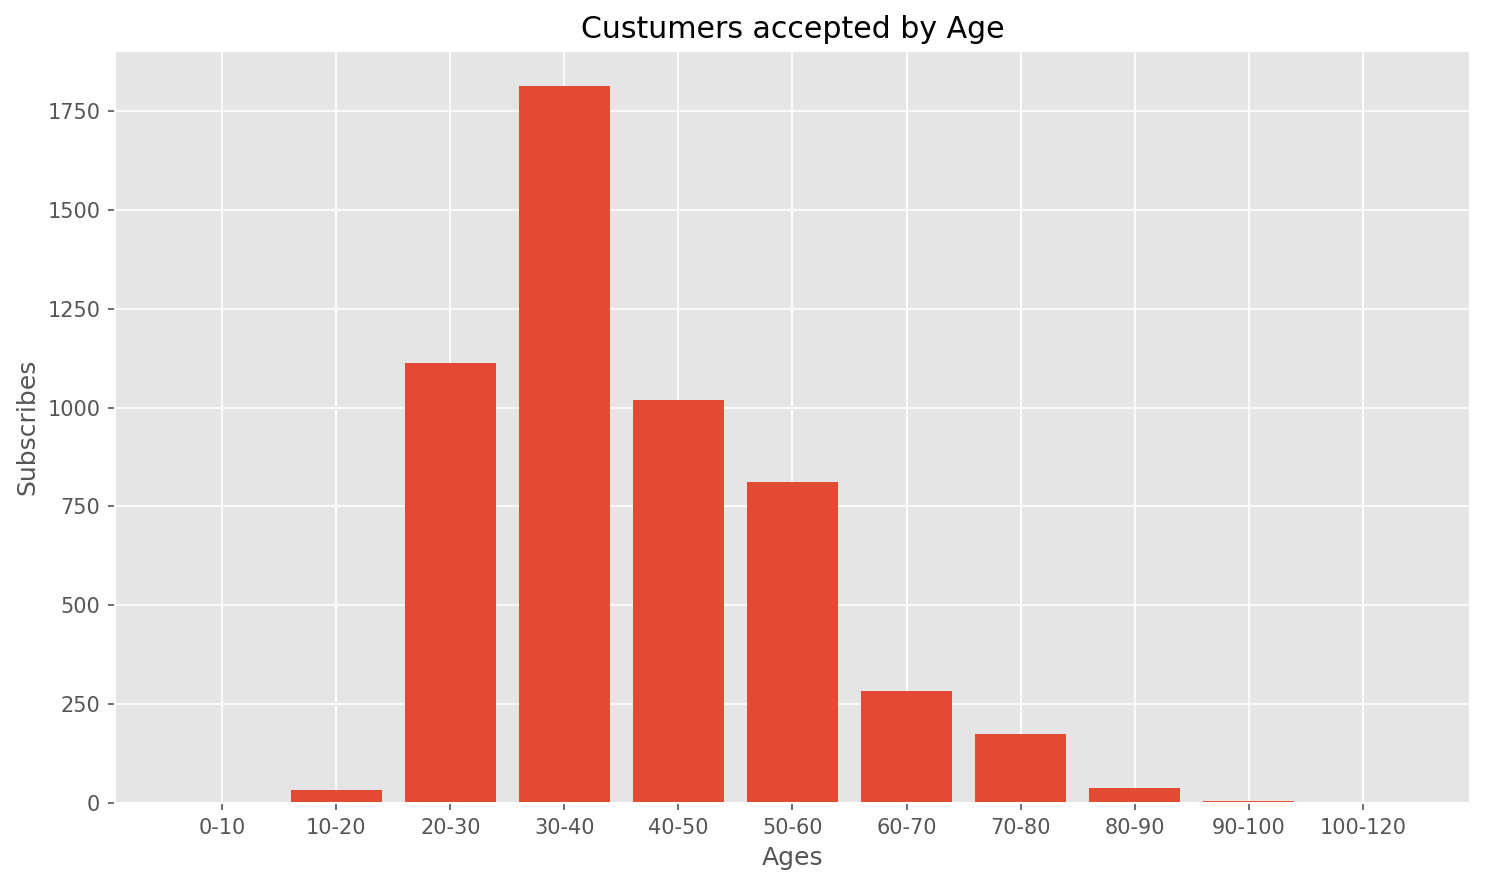

In [215]:
df['bin'] = pd.cut(custum_yes_df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers accepted by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

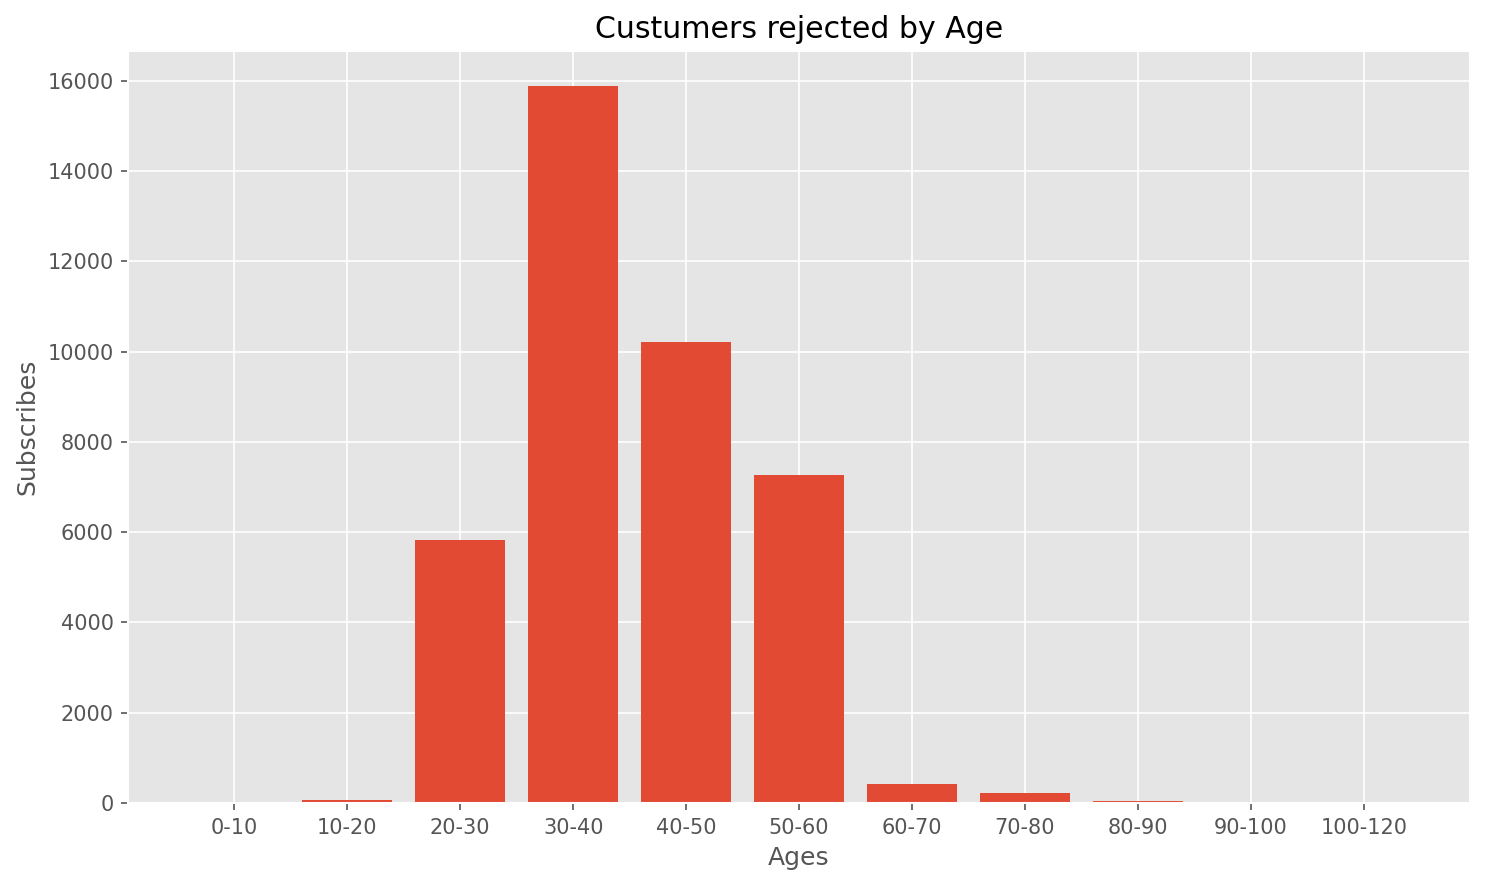

In [216]:
df['bin'] = pd.cut(custum_no_df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers rejected by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

No handles with labels found to put in legend.


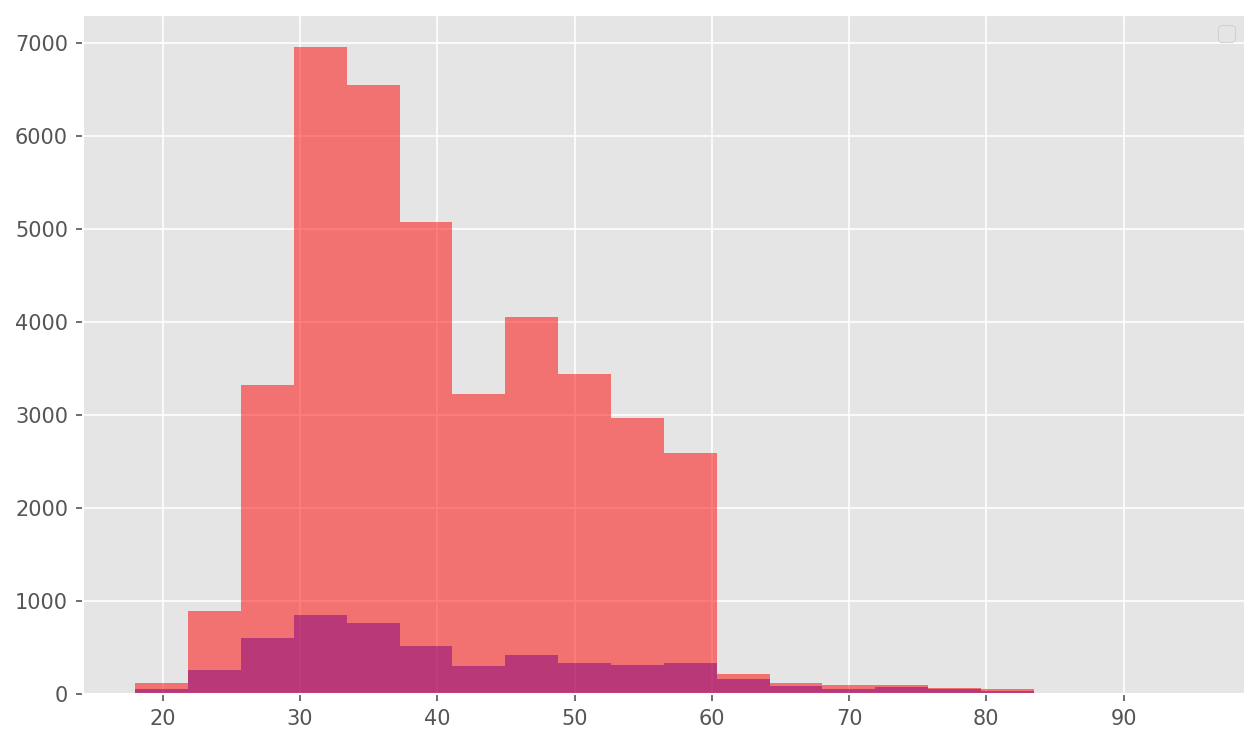

In [232]:
# plot
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('seaborn-colorblind')
plt.hist(custum_yes_df.age, bins=20, color='b', alpha=0.5)

plt.hist(custum_no_df.age, bins=20, color='r', alpha=0.5)
plt.legend(loc="upper right")
plt.show()

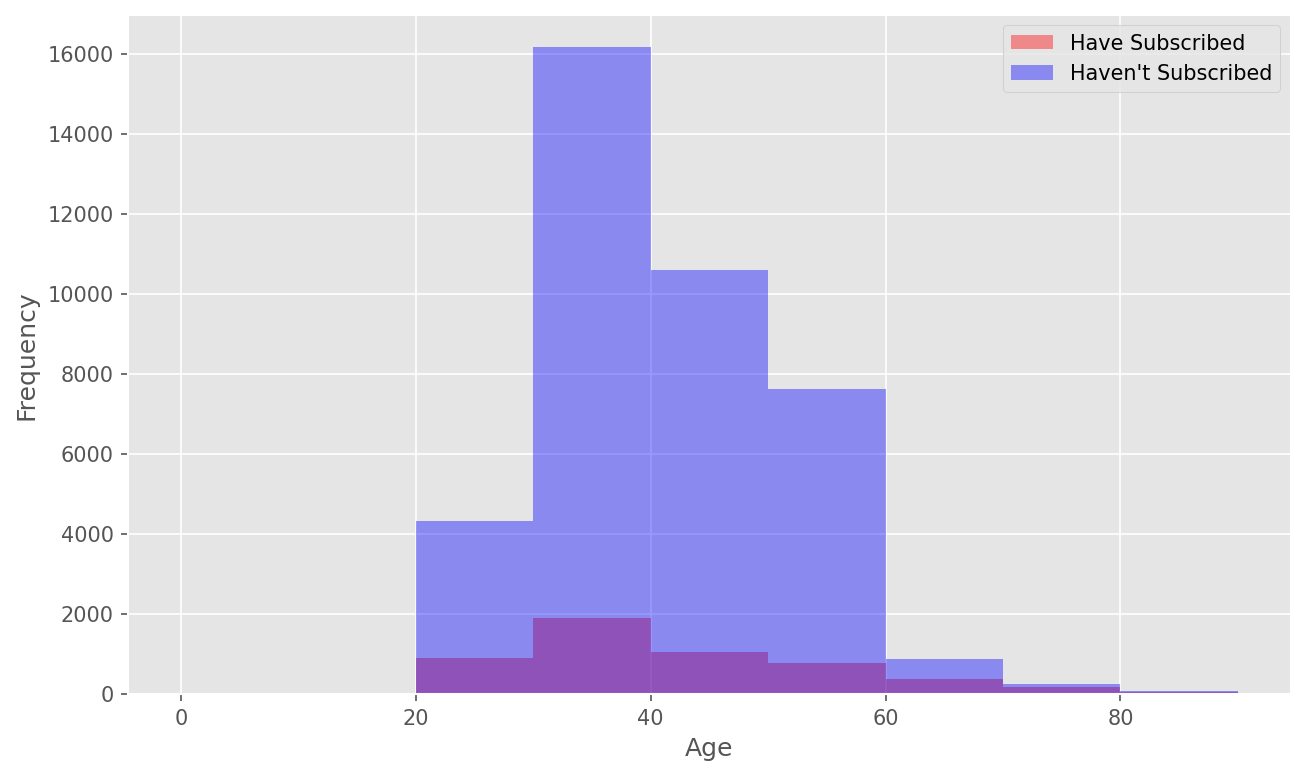

In [234]:

fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('seaborn-colorblind')
ax = sns.distplot(df.age[df.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('age_frequency_.png', transparent=False)

Text(0, 0.5, 'Frequency')

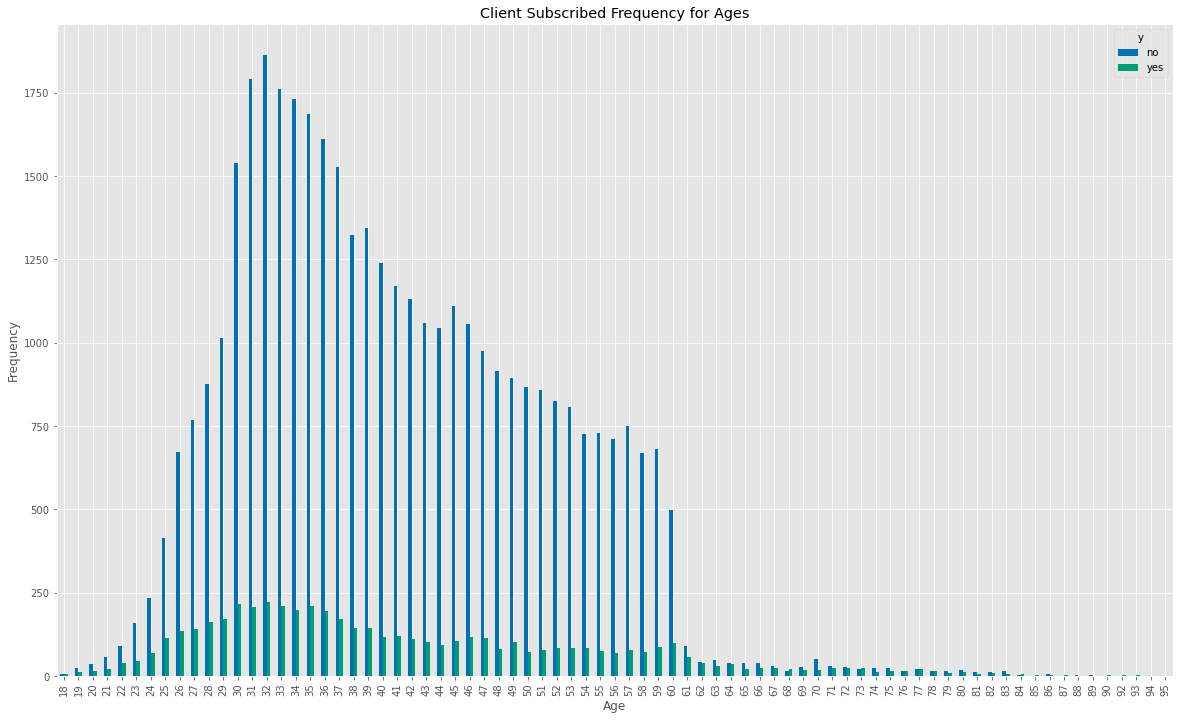

In [233]:
#Age
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,12))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')


In [110]:
# Based on the chart and data above, I decided to test if there two age groups 40-50 and 50-60. 
# It's seems that the difference in subcribing the term deposit is very little and I would like to know
# if it is because of randomness or something else


In [187]:
fourty_fifty_df = df[df.age < 50]
fourty_fifty_df = fourty_fifty_df[fourty_fifty_df.age >= 40]

fifty_sixty_df = df[df.age < 60]
fifty_sixty_df = fifty_sixty_df[fifty_sixty_df.age >= 50]

x1 = fourty_fifty_df['y'] == 'yes'
x2 = fifty_sixty_df['y']== 'yes'

fourty_fifty_yes = x1[x1 == True].sum()
fifty_sixty_yes = x2[x2 == True].sum()

fourty_fifty_no = x1[x1 == False].count()
fifty_sixty_no = x2[x2 == False].count()

total_fourty_fifty = fourty_fifty_yes + fourty_fifty_no
total_fifty_sixty = fifty_sixty_yes + fifty_sixty_no
total = fourty_fifty_yes + fifty_sixty_yes + fourty_fifty_no + fifty_sixty_no

stats.ttest_ind(x1, x2)


Ttest_indResult(statistic=-0.5162022150562433, pvalue=0.6057188723339183)

In [198]:
x1

1        False
3        False
7        False
9        False
10       False
         ...  
45151    False
45155     True
45166     True
45167    False
45181    False
Name: y, Length: 11655, dtype: bool

In [197]:
x2

0        False
8        False
12       False
13       False
14       False
         ...  
45186    False
45194    False
45201     True
45206     True
45209    False
Name: y, Length: 8410, dtype: bool

In [189]:
shared_sample_freq = (fourty_fifty_yes + fifty_sixty_yes) / total
shared_sample_variance = total * (shared_sample_freq * (1 - shared_sample_freq)) /\
(total_fourty_fifty * total_fifty_sixty)

diff_distrib = stats.norm(0, np.sqrt(shared_sample_variance))

sample_freq_50 = fourty_fifty_yes / total_fourty_fifty
sample_freq_60 = fifty_sixty_yes / total_fifty_sixty
difference_in_sample_proportions = sample_freq_50 - sample_freq_60
print("Difference in sample proportions: {:2.5f}".format(difference_in_sample_proportions))

Difference in sample proportions: -0.00214


In [190]:
p_value = 1 - diff_distrib.cdf(difference_in_sample_proportions)
print("p-value for accepting term deposit frequency comparison: {:2.2f}".format(p_value))

p-value for accepting term deposit frequency comparison: 0.70


In [191]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)
test_statistic = welch_test_statistic(x1, x2)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -0.52


In [192]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

df = welch_satterhwaithe_df(x1, x2)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 18005.67
